In [268]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

In [269]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv')
df.head(n=6)

,0,1
0,-3,0
1,0,-3
2,0,0
3,0,3
4,3,0
5,6,0


In [270]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

- `string.ascii_uppercase` son las letras del abacedario
- `df.iterrows()` iterar sobre filas de un dataframe
- `plt.annotate()` añade texto a una posición específica del gráfico

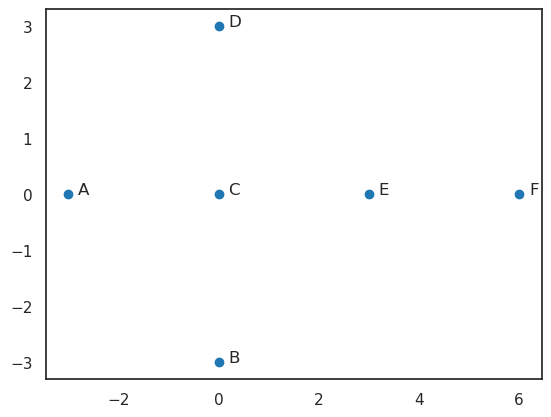

In [271]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

plt.scatter(df['0'], df['1'])

for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))

plt.show()

In [272]:
cluster = DBSCAN(eps=3, min_samples=4)
cluster.fit(df)

DBSCAN(eps=3, min_samples=4)

In [273]:
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')


DBSCAN found 1 clusters and 1 points of noise.


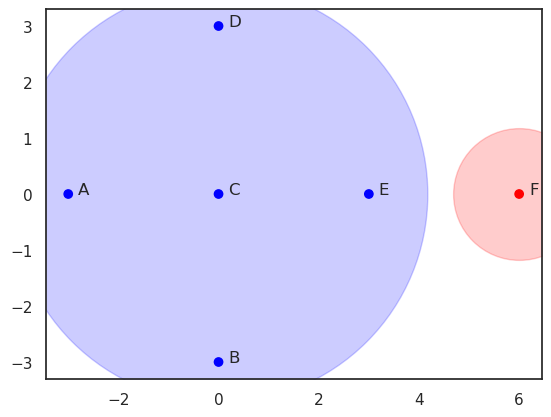

In [274]:
plt.scatter(df['0'], df['1'],
            c=[['blue', 'red'][l] for l in cluster.labels_])

plt.scatter(0,0, c='blue', alpha=0.2, s =90000)
plt.scatter(6,0, c='red', alpha=0.2, s =9000)

for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

In [275]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,11,15,14,14,0,0,0
1,0,16,10,0,0,0,0,0,0,0,...,14,0,0,0,0,-1,2,13,7,1
2,0,12,14,6,5,3,0,0,0,16,...,0,0,10,11,0,0,2,14,8,2


In [276]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()

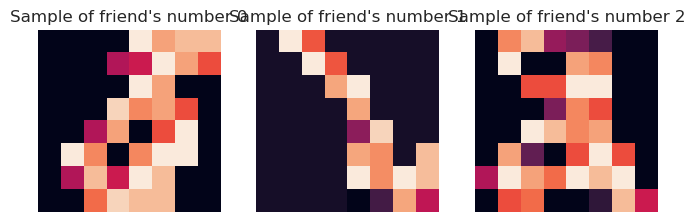

In [277]:
plt.rcParams['figure.figsize'] = (8,6)

it = (x.reshape(8,8) for x in friend_digits)

c = 3 # columns

fig, ax = plt.subplots(1, c, sharex = 'col', sharey='row')

for j in range(3):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))

plt.show()


In [278]:
# Load the data
digits, y = load_digits(return_X_y=True)
pd.DataFrame(digits).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


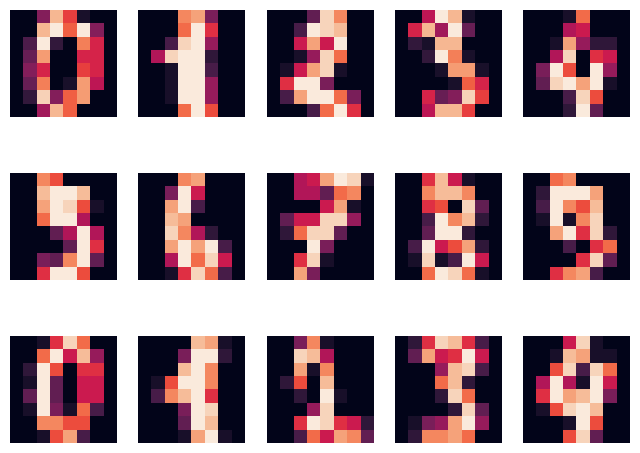

In [279]:
plt.rcParams['figure.figsize'] = (8,6)

it = (x.reshape(8,8) for x in digits )
r,c = 3,5 #rows & colums

fig, ax = plt.subplots(r,c, sharex='col', sharey='row')

for i in range(r):
    for j in range(c):
        ax[i,j].axis('off')
        ax[i,j].imshow(next(it))
    
plt.show()

In [280]:
data = np.r_[digits, friend_digits]
y = np.r_[y, df['y']]

- `TSNE`: Esta es la clase en scikit-learn que implementa el algoritmo t-SNE para la reducción de dimensionalidad y visualización.
- `ǹ_components=2`: Especifica el número de dimensiones en las que deseas proyectar tus datos. En este caso, los datos originales de alta dimensionalidad se reducirán a 2 dimensiones para facilitar la visualización (generalmente en un gráfico 2D).
- `n_iter=500`: Especifica el número máximo de iteraciones que el algoritmo t-SNE debe ejecutar.
- `n_iter_without_progress=150`: Indica cuántas iteraciones el algoritmo debe ejecutar sin observar mejora significativa en la optimización antes de detenerse de manera anticipada
- `perplexity=10`: puede considerarse como una estimación de la cantidad de vecinos cercanos que tiene cada punto, y debe estar relacionado con el número de puntos en el conjunto de datos. En este caso, el valor es 10, lo cual es un valor moderado.


In [281]:
embedding = TSNE(n_components=2,
                 init='pca',
                 n_iter=500,
                 n_iter_without_progress=150,
                 perplexity=10,
                 random_state=0)

In [282]:
e_data = embedding.fit_transform(data)

In [283]:
e_data[:-n,0]

array([ -2.61512  ,  18.537098 ,  -7.6209083, ...,  -3.284137 ,
       -26.239916 ,  -7.035599 ], dtype=float32)

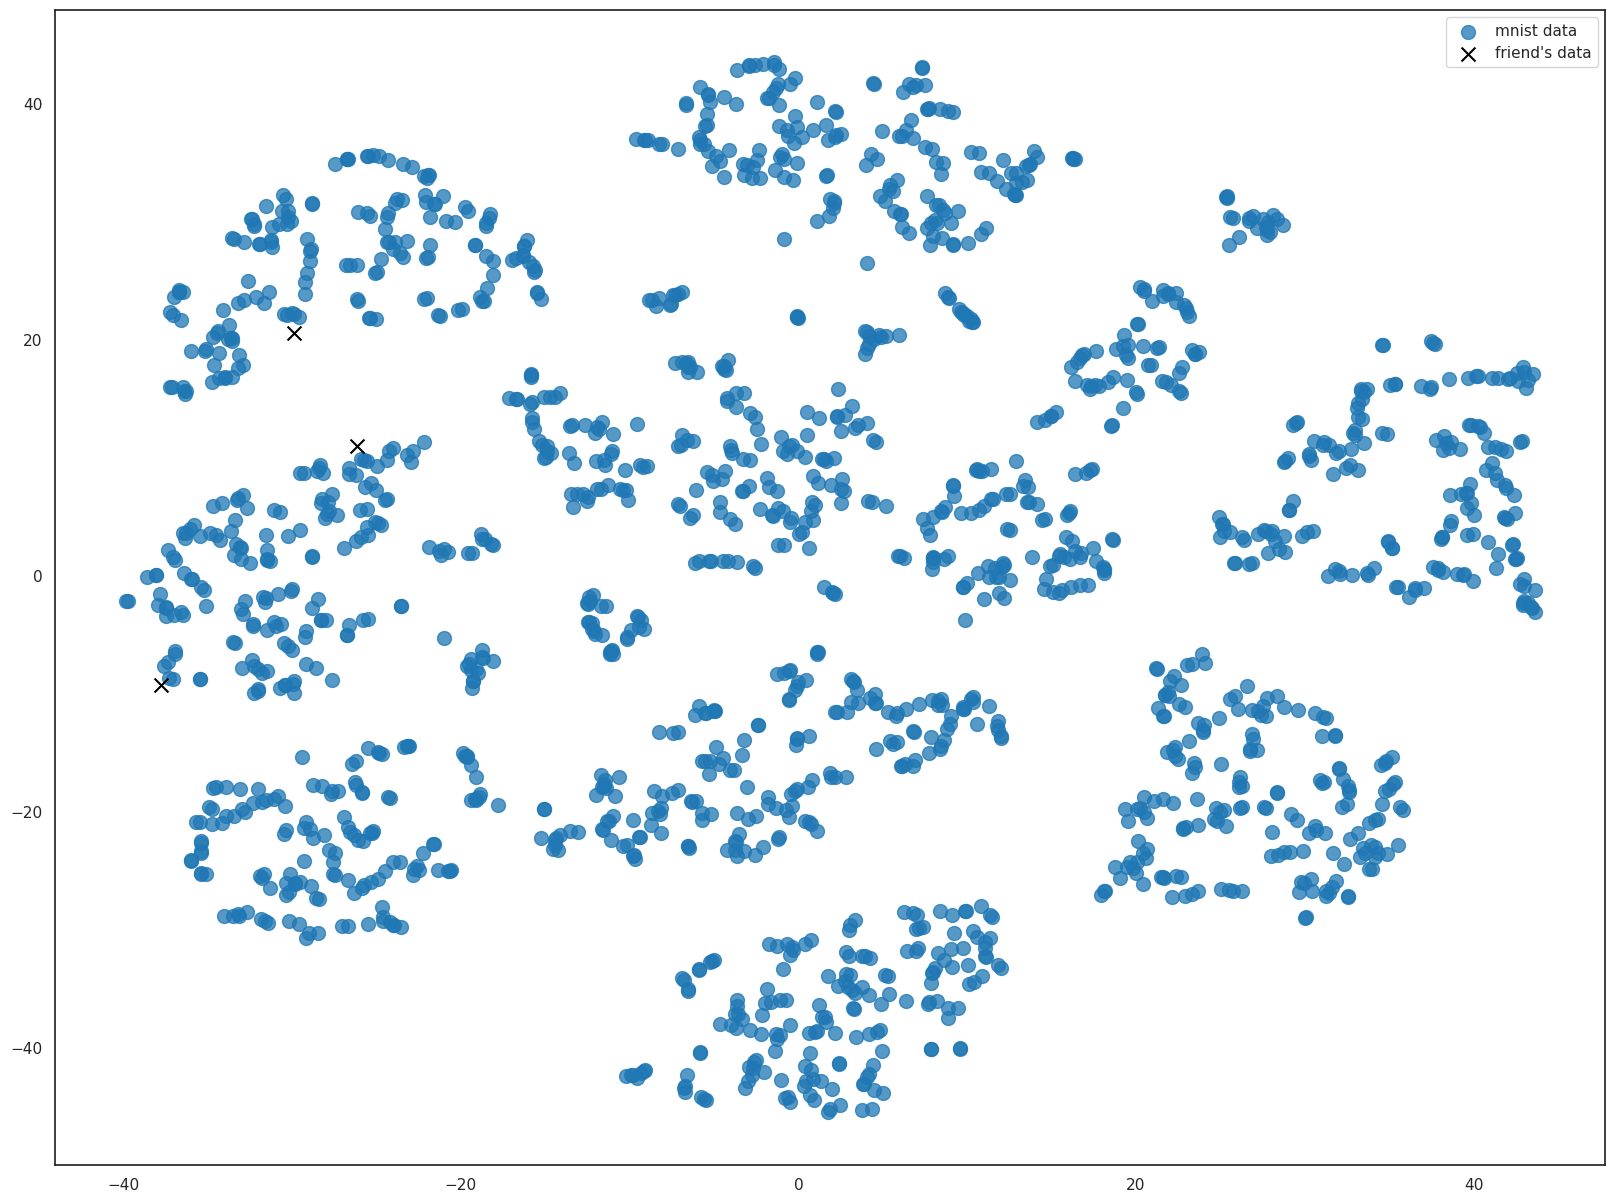

In [284]:
plt.rcParams['figure.figsize'] = (20,15)

n = friend_digits.shape[0]

plt.scatter(e_data[:-n,0],
            e_data[:-n, 1],
            marker='o',
            alpha=0.75,
            label='mnist data',
            s=100)

plt.scatter(
            e_data[-n:, 0],
            e_data[-n:, 1],
            marker='x',
            color='black',
            label='friend\'s data',
            alpha=1,
            s=100)
plt.legend(bbox_to_anchor=[1,1])
plt.show()

In [285]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 12 clusters and 25 points of noise.


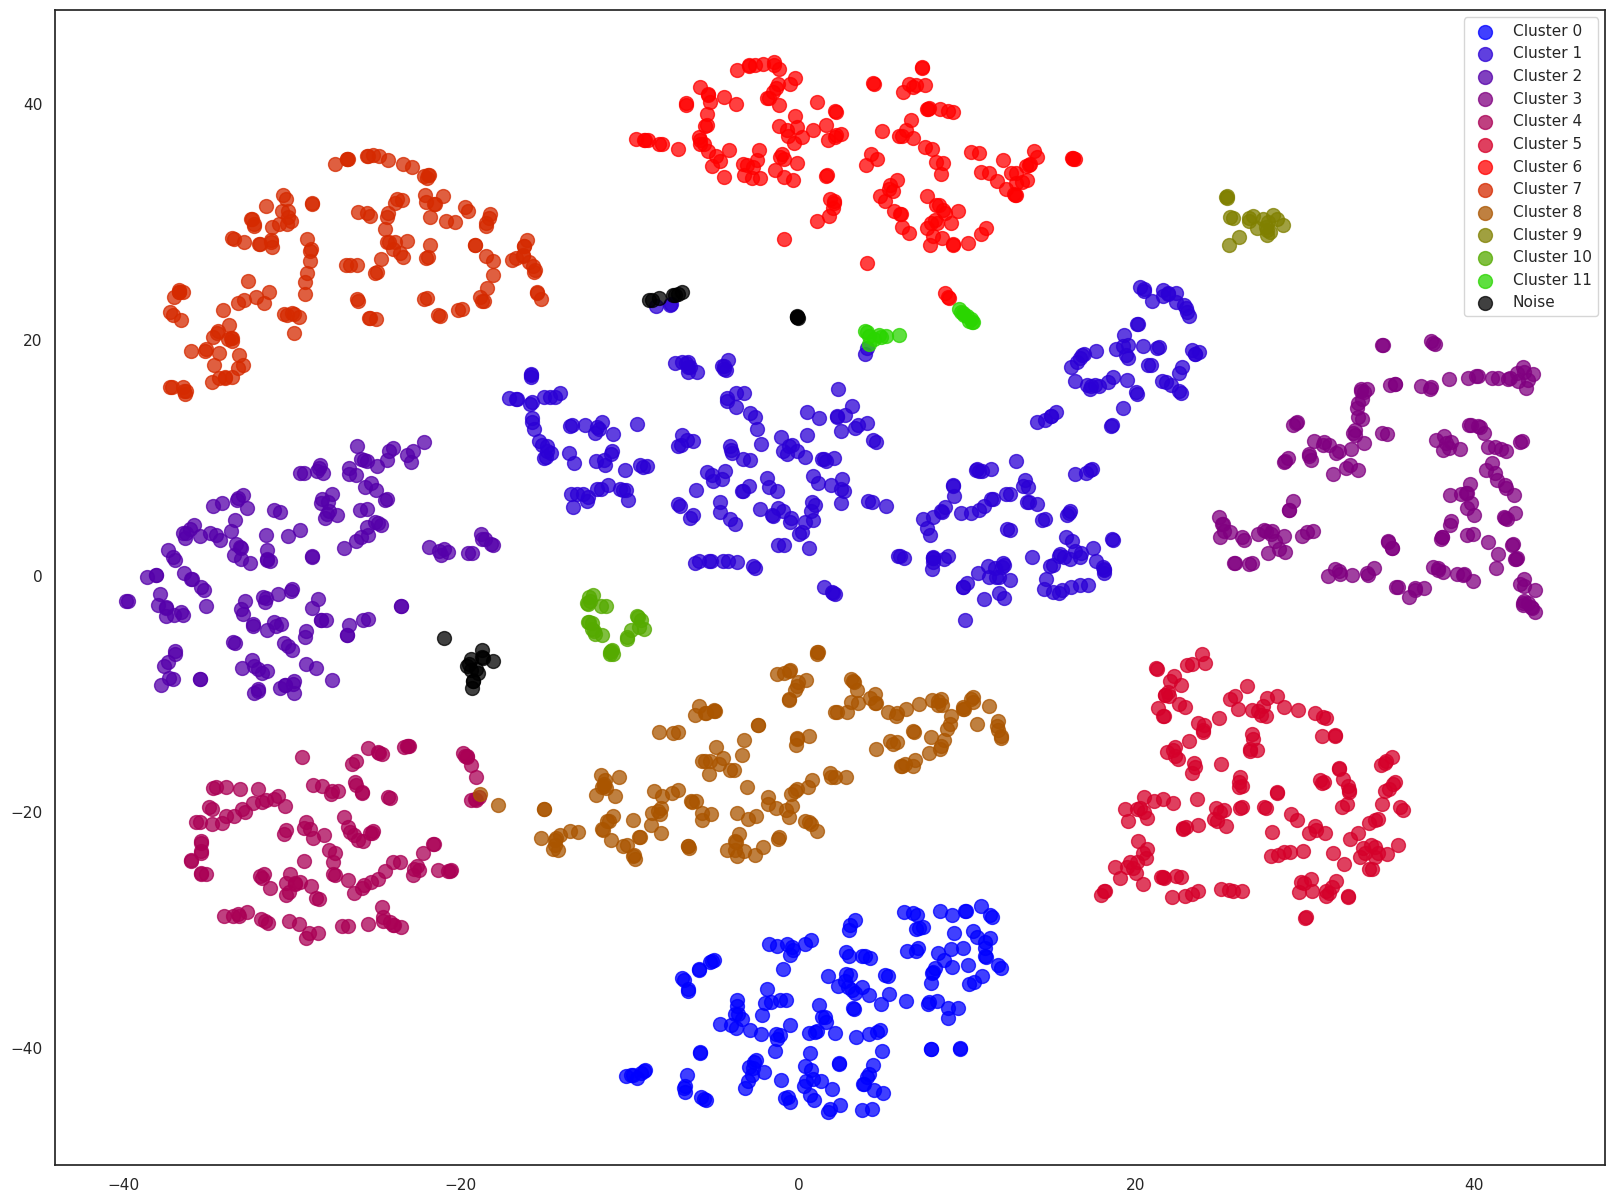

In [286]:
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(cluster.labels_)

n_labels = len(unique_labels)

cmap = plt.cm.get_cmap('brg', n_labels) #color map para asignar color distintos

for l in unique_labels:
    plt.scatter(e_data[cluster.labels_ == l, 0],
                e_data[cluster.labels_ == l, 1],
                c = [cmap(l) if l >= 0 else 'Black'],
                alpha=0.75,
                s=100,
                label=f'Cluster {l}' if l >= 0 else 'Noise')

plt.legend(bbox_to_anchor=[1,1])
plt.show()

In [287]:
print("The predicted labels of our friend's handwriting")
cluster.labels_[-3:]

The predicted labels of our friend's handwriting


array([2, 7, 2])

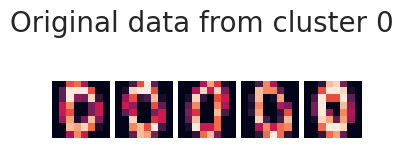

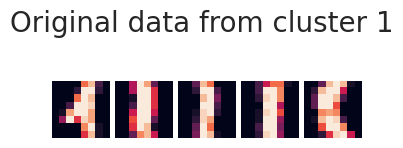

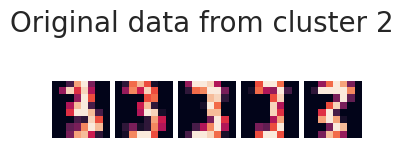

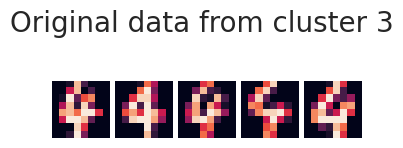

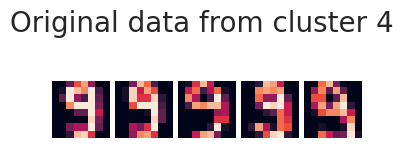

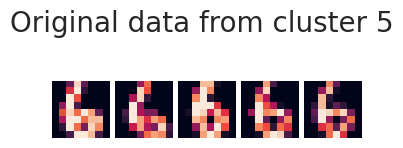

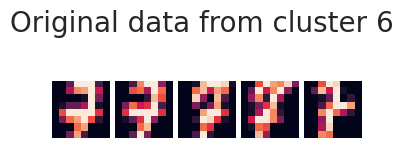

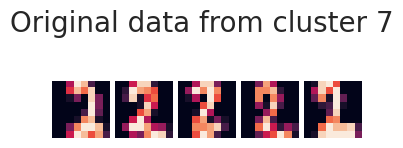

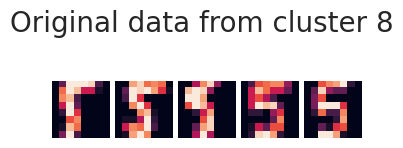

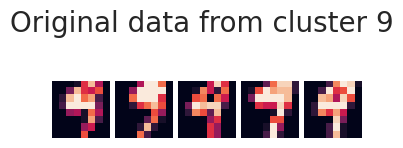

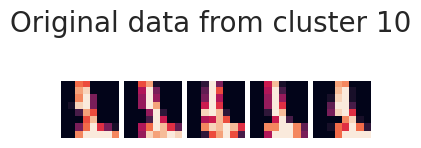

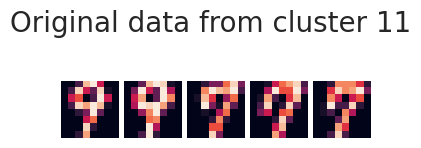

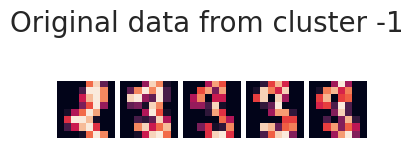

In [288]:
r, c = 1,5
plt.rcParams['figure.figsize'] = (4*r,4*c)

for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r*c, replace=False)]
    it = (x.reshape(8,8) for x in nums)
    fig, ax = plt.subplots(r,c)
    ax = ax.reshape(r,c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)

    for i in range(r):
        for j in range(c):
            ax[i,j].axis('off')
            ax[i,j].imshow(next(it))

plt.show()

Correct labels:


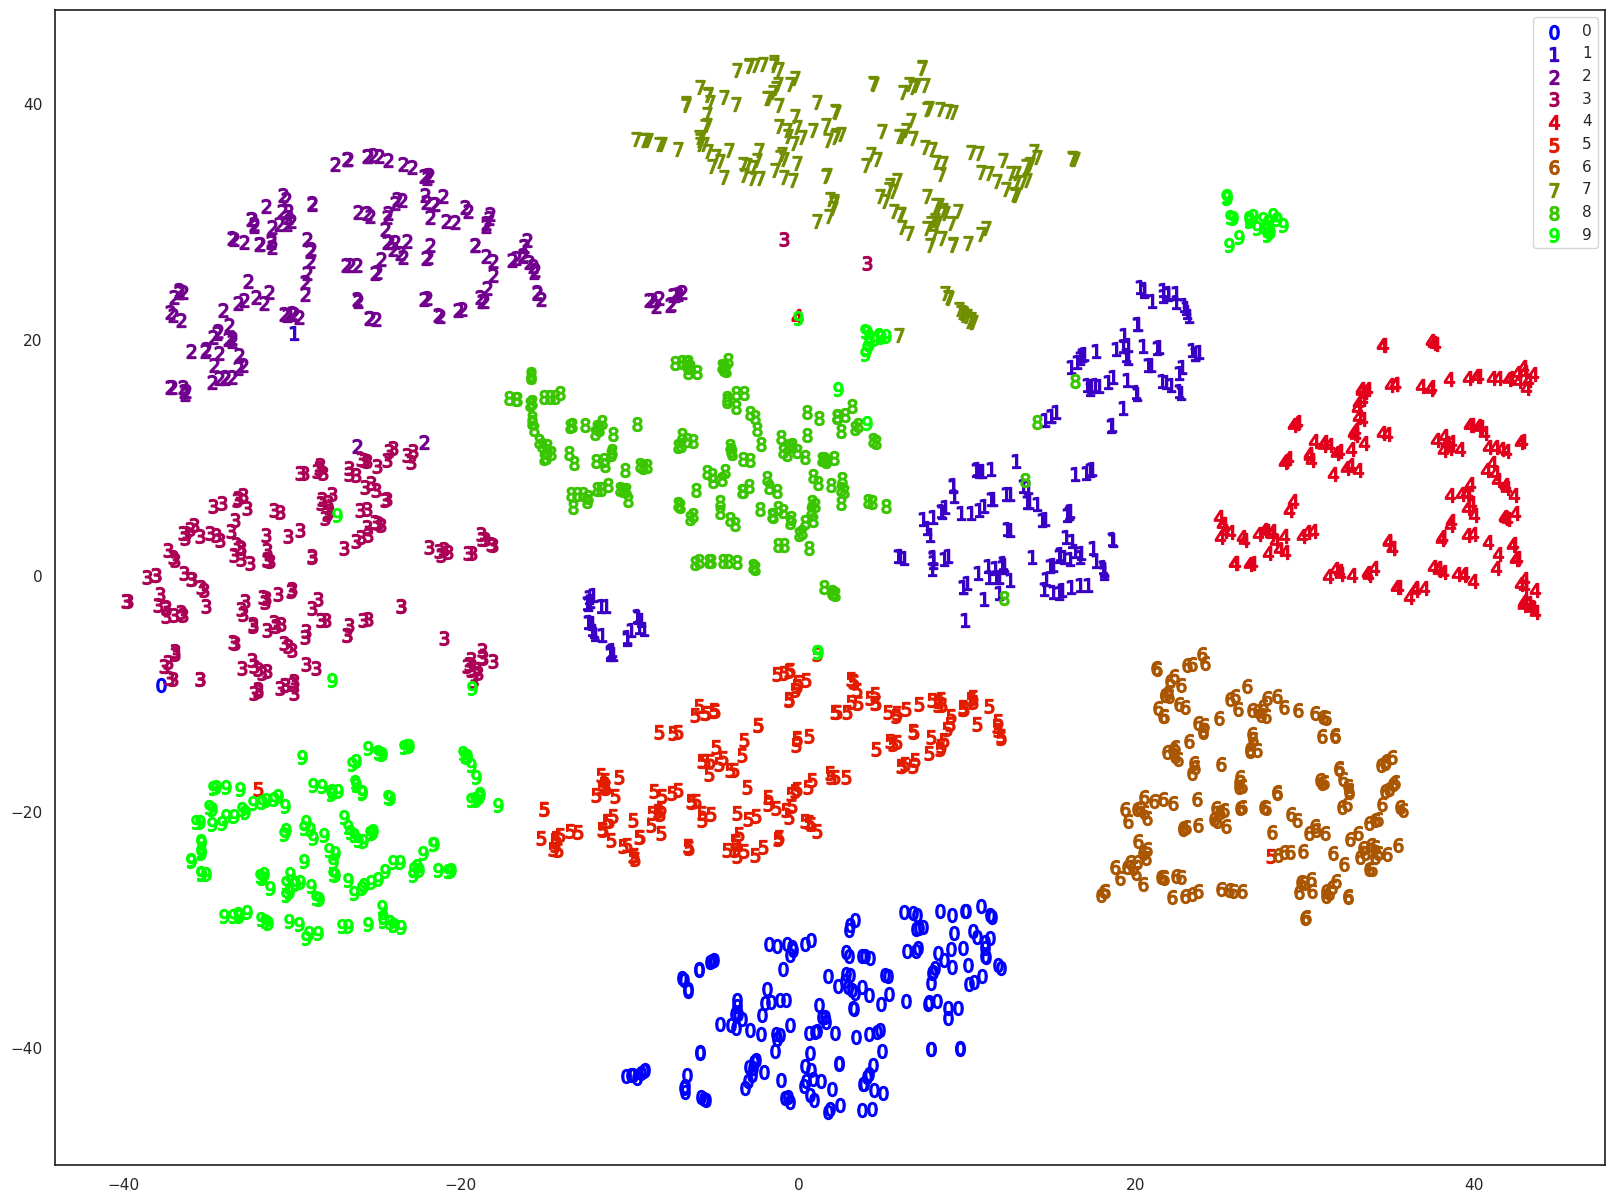

In [289]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',
        alpha=1,
        label=f'{l}',
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [293]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')
        
    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #2
Cluster 2 is 97.11% the number 3
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #7
Cluster 7 is 99.40% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #2
Cluster 2 is 97.11% the number 3
Your friend's 2th sample is supposed to be the number 2


In [294]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


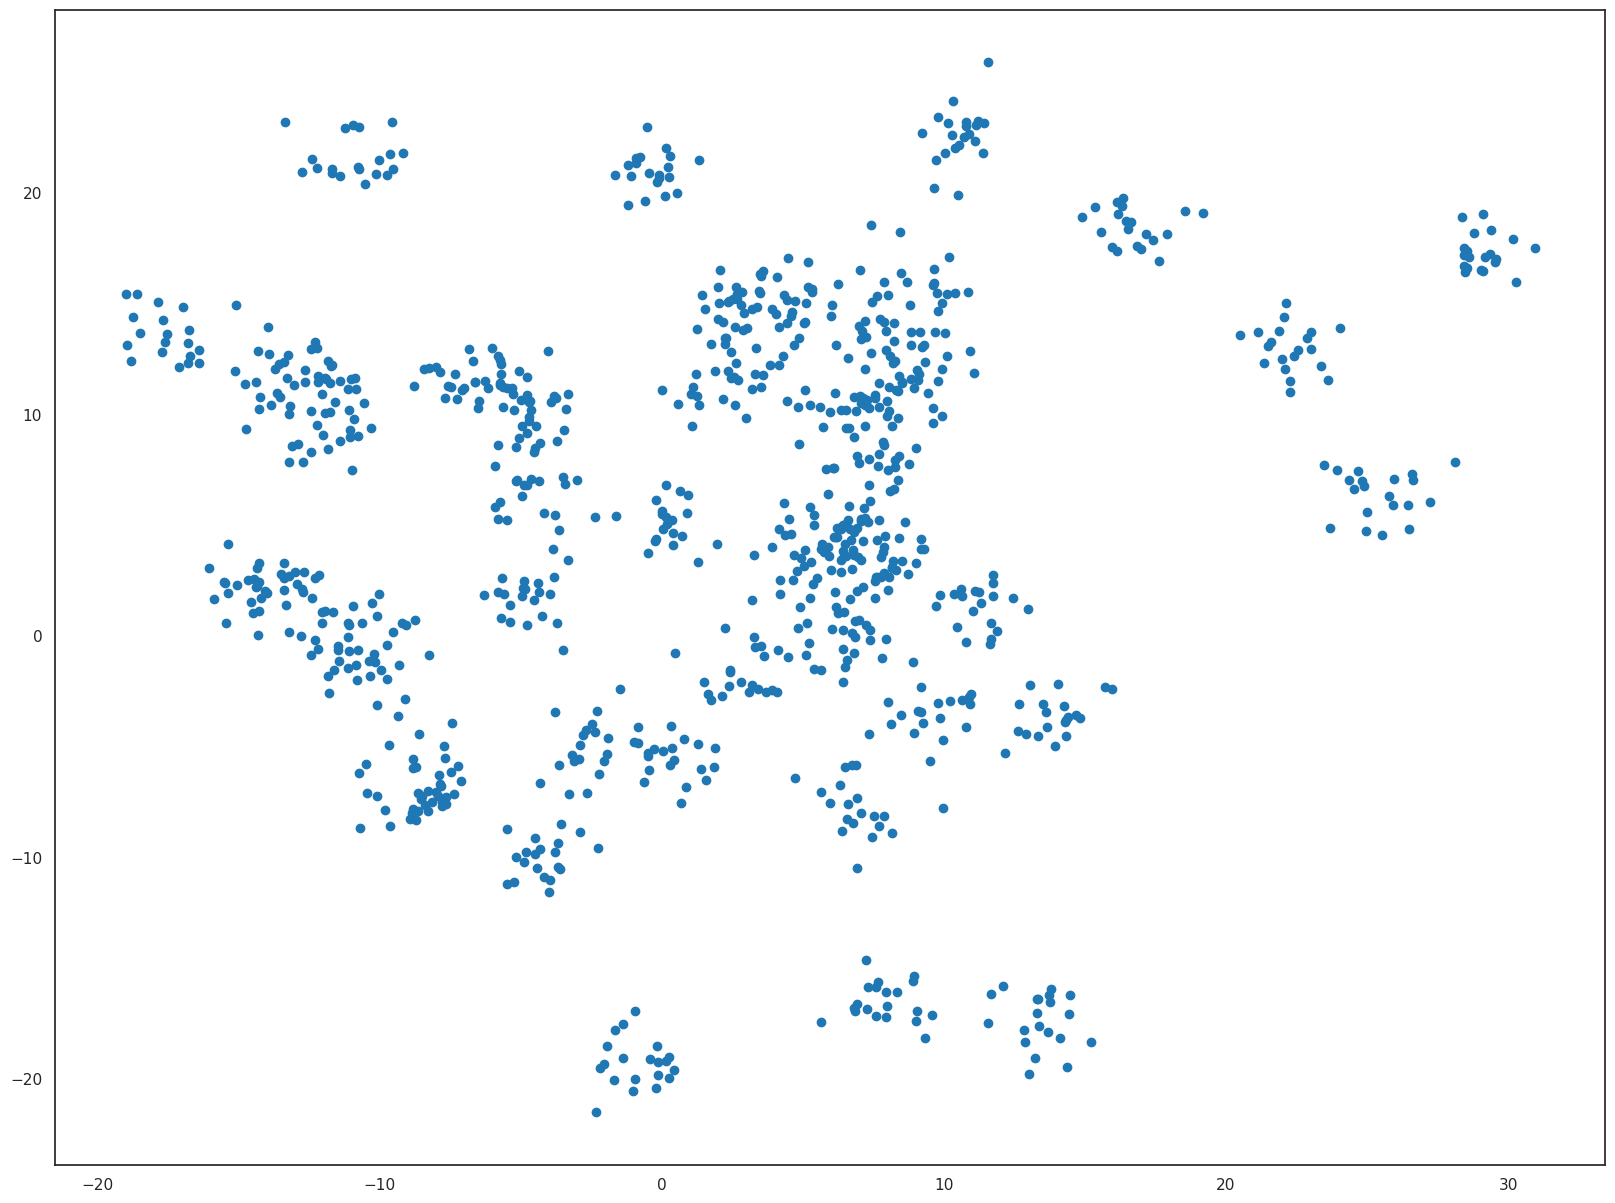

In [295]:
plt.scatter(df['x'], df['y'])
plt.show()

In [296]:
cluster = DBSCAN(eps=4, min_samples=4)
cluster.fit(df)

len(set(cluster.labels_)-{1})

6

In [297]:
print(f'{100 * (cluster.labels_ == -1).sum() / len(cluster.labels_)}')

0.0


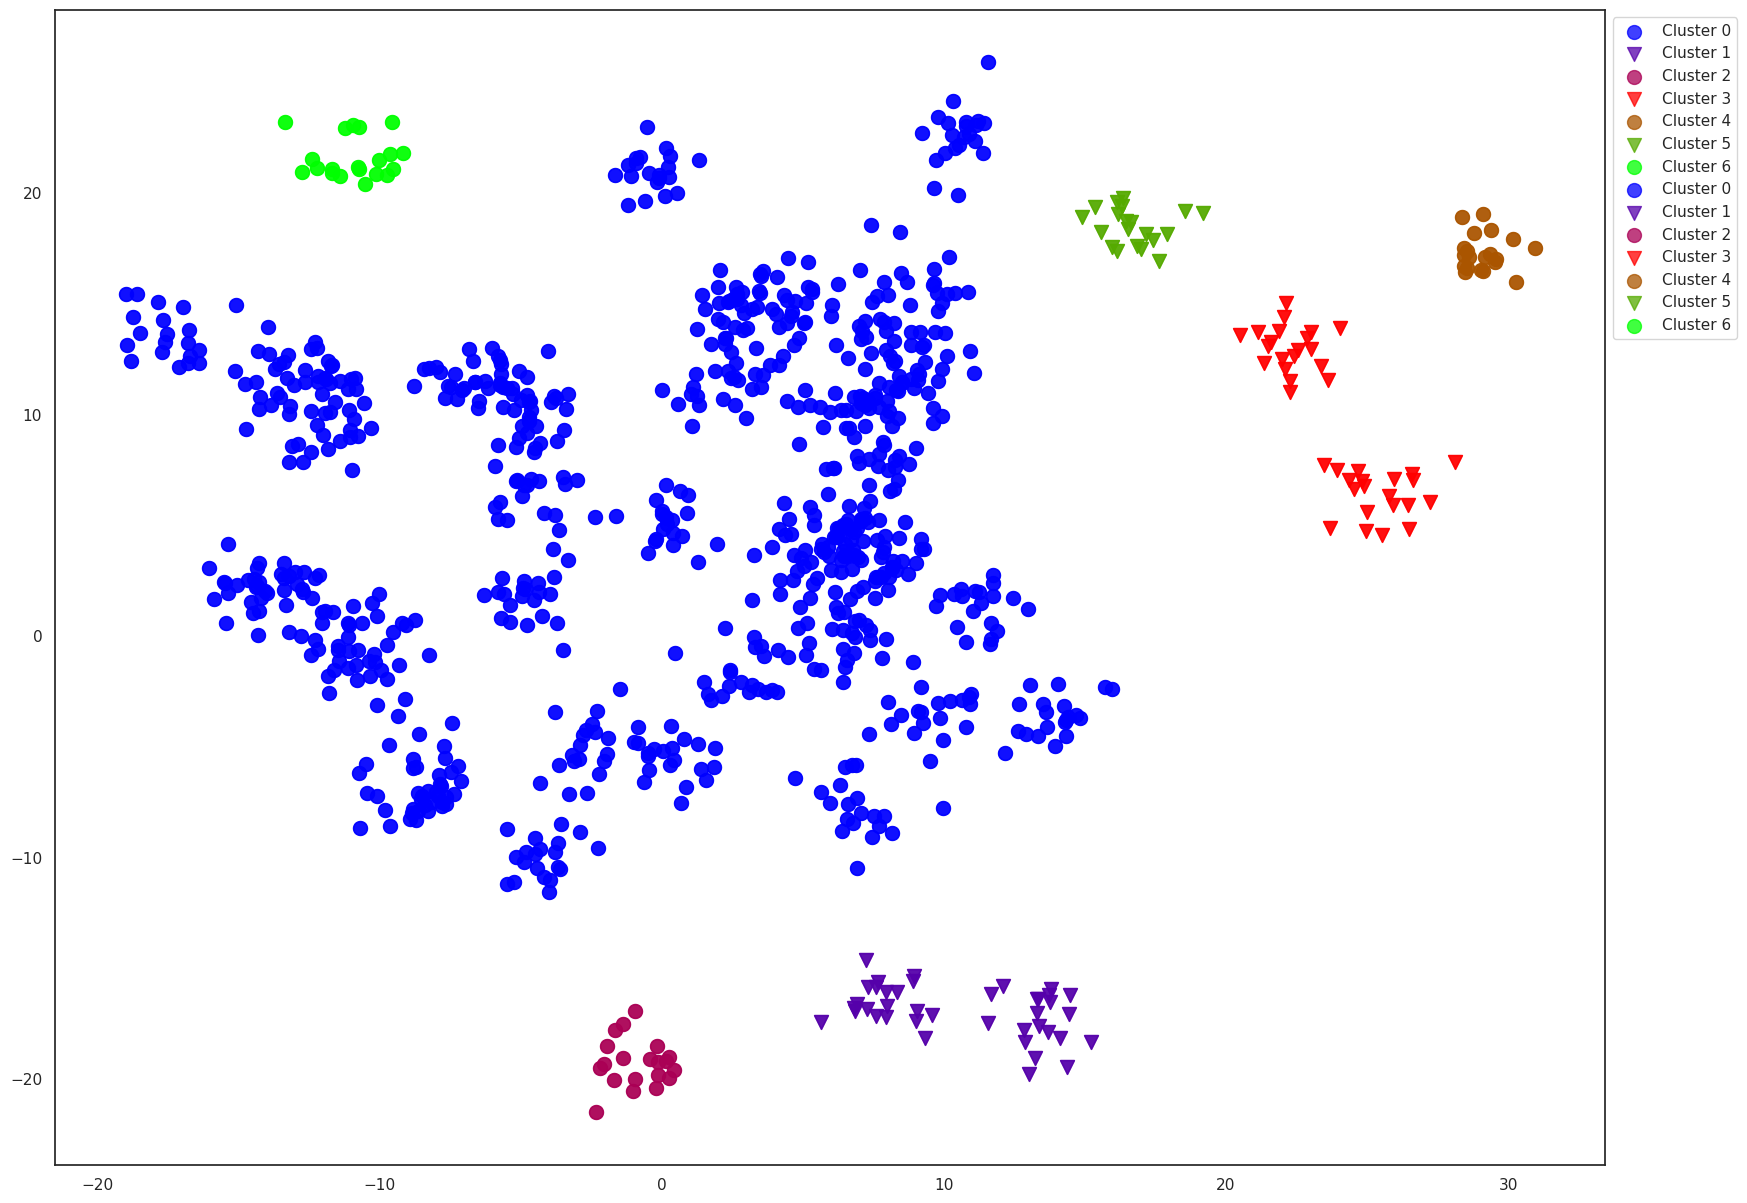

In [299]:
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)

for l in unique_labels:
    plt.scatter(df['x'][cluster.labels_==l],
                df['y'][cluster.labels_ ==l],
                c=[cmap(l)],
                marker='ov'[l%2],
                alpha=0.75,
                s=100,
                label=f'Cluster {l}' if l >= 0 else 'Noise')

plt.legend(bbox_to_anchor=[1,1])
plt.show()